# 🔶 House Price Predict Model

" "

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# پیش پردازش

In [125]:
df = pd.read_csv("housepricekaggle.csv")
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

In [127]:
df = df.astype({
    "Area": int ,
    'Room' : int , 
    'Parking' : int , 
    'Warehouse' : int , 
    'Elevator' : int ,
    'Price' : float , 
    'Price(USD)' : float
})
df.describe()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
count,3453.000000,3453.000000,3453.000000,3453.000000,3453.000000,3.453000e+03,3.453000e+03
mean,107.238923,2.081089,0.847379,0.914857,0.787142,5.376473e+09,1.792158e+05
std,71.295250,0.759889,0.359674,0.279135,0.409388,8.122912e+09,2.707637e+05
min,30.000000,0.000000,0.000000,0.000000,0.000000,3.600000e+06,1.200000e+02
25%,69.000000,2.000000,1.000000,1.000000,1.000000,1.420000e+09,4.733333e+04
50%,90.000000,2.000000,1.000000,1.000000,1.000000,2.900000e+09,9.666667e+04
75%,120.000000,2.000000,1.000000,1.000000,1.000000,6.000000e+09,2.000000e+05
max,1000.000000,5.000000,1.000000,1.000000,1.000000,9.240000e+10,3.080000e+06


In [129]:
print(f"{df['Price'].mean():,.2f} , {df['Price(USD)'].mean():,.2f}")

5,376,472,922.12 , 179,215.76


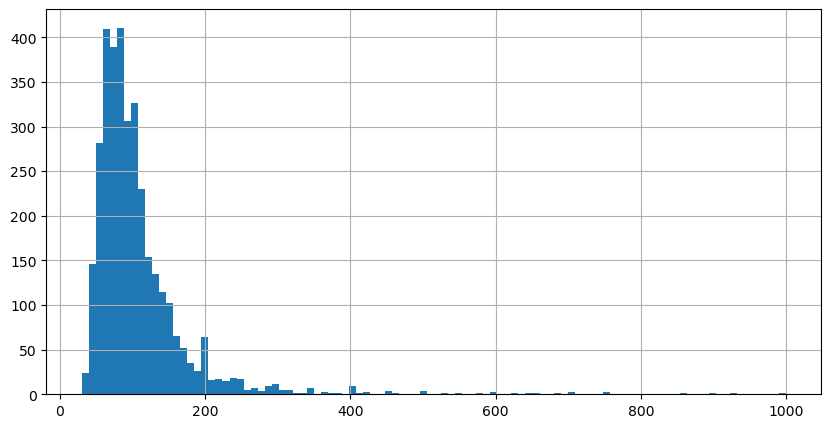

In [131]:
fig = plt.figure(figsize =(10, 5))
df['Area'].hist(bins=100)
plt.show()


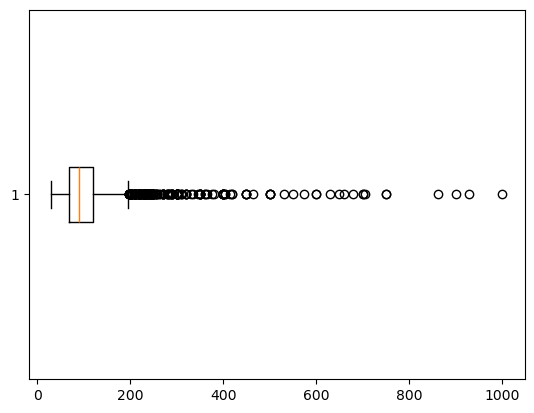

In [109]:
plt.boxplot(df.Area,vert=False)
plt.show()

In [133]:
Q1 = df['Area'].quantile(0.25)
Q3 = df['Area'].quantile(0.75)
IQR = Q3 - Q1

filter = (df['Area'] >= (Q1 - 1.5 * IQR)) & (df['Area'] <= (Q3 + 1.5 * IQR))
df = df.loc[filter]

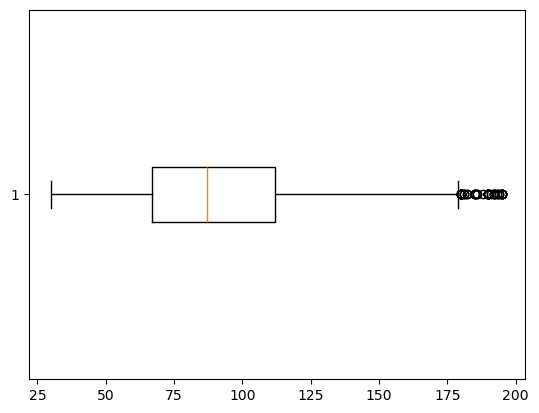

In [135]:
plt.boxplot(df.Area,vert=False)
plt.show()

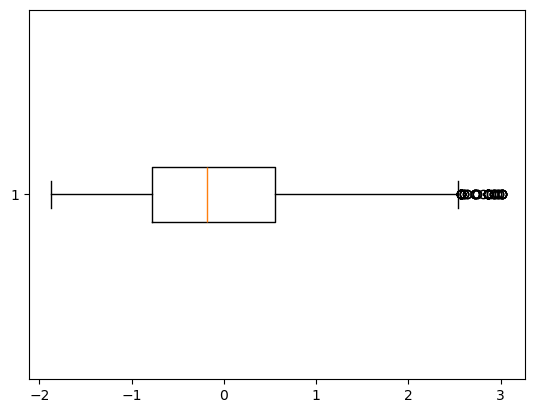

In [137]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Area']] = scaler.fit_transform(df[['Area']])

plt.boxplot(df.Area,vert=False)
plt.show()

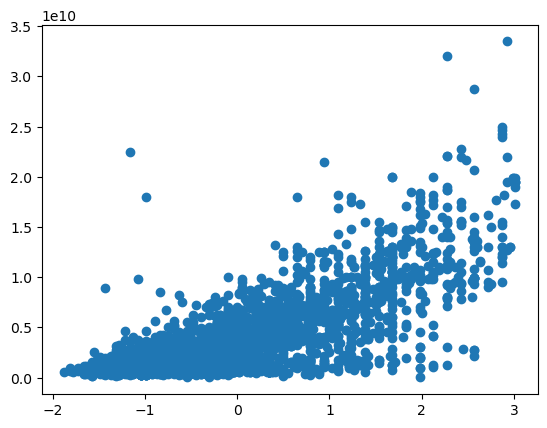

In [143]:
plt.scatter(df.Area , df.Price)
x = np.arange(-2,3,0.1)
y = 
plt.show()

### ساخت مدل بدون درنظر گرفتن منطقه

In [187]:
msk = np.random.randn(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [189]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Area','Room', 'Parking', 'Warehouse', 'Elevator']])
train_y = np.asanyarray(train['Price'])
regr.fit(train_x,train_y)

LinearRegression()

In [197]:
test_x = np.asanyarray(test[['Area','Room', 'Parking', 'Warehouse', 'Elevator']])
test_y = np.asanyarray(test['Price'])
hat_y = regr.predict(test_x)

In [205]:
from sklearn.metrics import r2_score
MAE = np.mean(np.absolute(hat_y - test_y))
r2_S = r2_score(test_y,hat_y)
print(f"MAE : {MAE} , R2 Score : {r2_S}")
print(regr.coef_,regr.intercept_)

MAE : 1833369445.697484 , R2 Score : 0.5492009124440314
[ 3.12006659e+09 -8.74214649e+08  6.51855856e+08  3.54536195e+08
  2.37644982e+08] 4574852721.978804


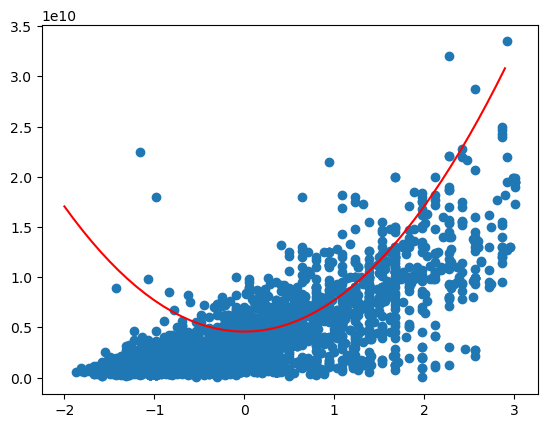

In [249]:
plt.scatter(df.Area , df.Price)
x = np.arange(-2,3,0.1)
y = regr.intercept_ + (x**2)*regr.coef_[0] + x**3
plt.plot(x,y,'r')
plt.show()